In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import abc_load as abc

## Load TH+ZI spatial subset from public ABC dataset

In [3]:
adata_th_zi = abc.load_adata(transform='log2', subset_to_TH_ZI=True, 
                             with_metadata=True, flip_y=True,
                             with_colors=True)

In [4]:
adata_th_zi

AnnData object with n_obs × n_vars = 227191 × 550
    obs: 'brain_section_label', 'TH_ZI_dataset', 'average_correlation_score', 'class', 'class_color', 'cluster', 'cluster_alias', 'cluster_color', 'donor_genotype', 'donor_label', 'donor_sex', 'feature_matrix_label', 'neurotransmitter', 'neurotransmitter_color', 'parcellation_category', 'parcellation_category_color', 'parcellation_division', 'parcellation_division_color', 'parcellation_index', 'parcellation_organ', 'parcellation_organ_color', 'parcellation_structure', 'parcellation_structure_color', 'parcellation_substructure', 'parcellation_substructure_color', 'subclass', 'subclass_color', 'supertype', 'supertype_color', 'x_ccf', 'x_reconstructed', 'x_section', 'y_ccf', 'y_reconstructed', 'y_section', 'z_ccf', 'z_reconstructed', 'z_section'
    var: 'gene_symbol', 'transcript_identifier'
    uns: 'accessed_on', 'src', 'counts_transform'

## def plot_dataset()

In [5]:
import anndata as ad
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.lines import Line2D
%matplotlib inline

def plot_dataset(adata, column='class'):
    
    cell_df = adata.obs

    # define legend elements for the column colors
    color_col = column+'_color'
    categories = cell_df[column].unique()
    cat_color_mapping = dict(zip(categories, cell_df[color_col].unique()))
    # sort the dict & the categories list by category
    cat_color_mapping = dict(sorted(cat_color_mapping.items()))
    categories = sorted(categories)
    legend_elements = [Line2D([0], [0], 
                              lw=0, marker='o', markersize=10,
                              markerfacecolor=cat_color_mapping[cat],
                              color=cat_color_mapping[cat], 
                              label=cat) 
                       for cat in cat_color_mapping]
    
    z_sections = sorted(cell_df['z_reconstructed'].unique())
    
    n_col = 2
    n_row = int(np.ceil(len(z_sections) / n_col))
    fig, axes = plt.subplots(n_row, n_col, figsize=(12,30))
    axes = axes.ravel()

    # x_min = 2.5; x_max = 8.5; y_min = 7.5; y_max = 4

    for i, sec in enumerate(z_sections):
        ax = axes[i]

        curr_sec_cell_df = cell_df[(cell_df['z_reconstructed']==sec)]

        sc = ax.scatter(curr_sec_cell_df['x_reconstructed'], curr_sec_cell_df['y_reconstructed'],
                        color=curr_sec_cell_df['class_color'],
                        s=0.5, marker='.', zorder=1)
        ax.set_title('z='+str(sec))

        # ax.set_xlim((x_min,x_max))
        # ax.set_ylim((y_min,y_max))
        ax.set_xlabel('x_reconstructed')
        ax.set_ylabel('y_reconstructed')
        ax.axis('equal')
        ax.axis('off')
        # ax.set_xticks([])
        # ax.set_yticks([])

        if i==7:
            ax.legend(legend_elements, categories, title='class', 
                      loc='center left', bbox_to_anchor=(1.1,0.5))

## Display output of abc.load_adata()

### display all cells

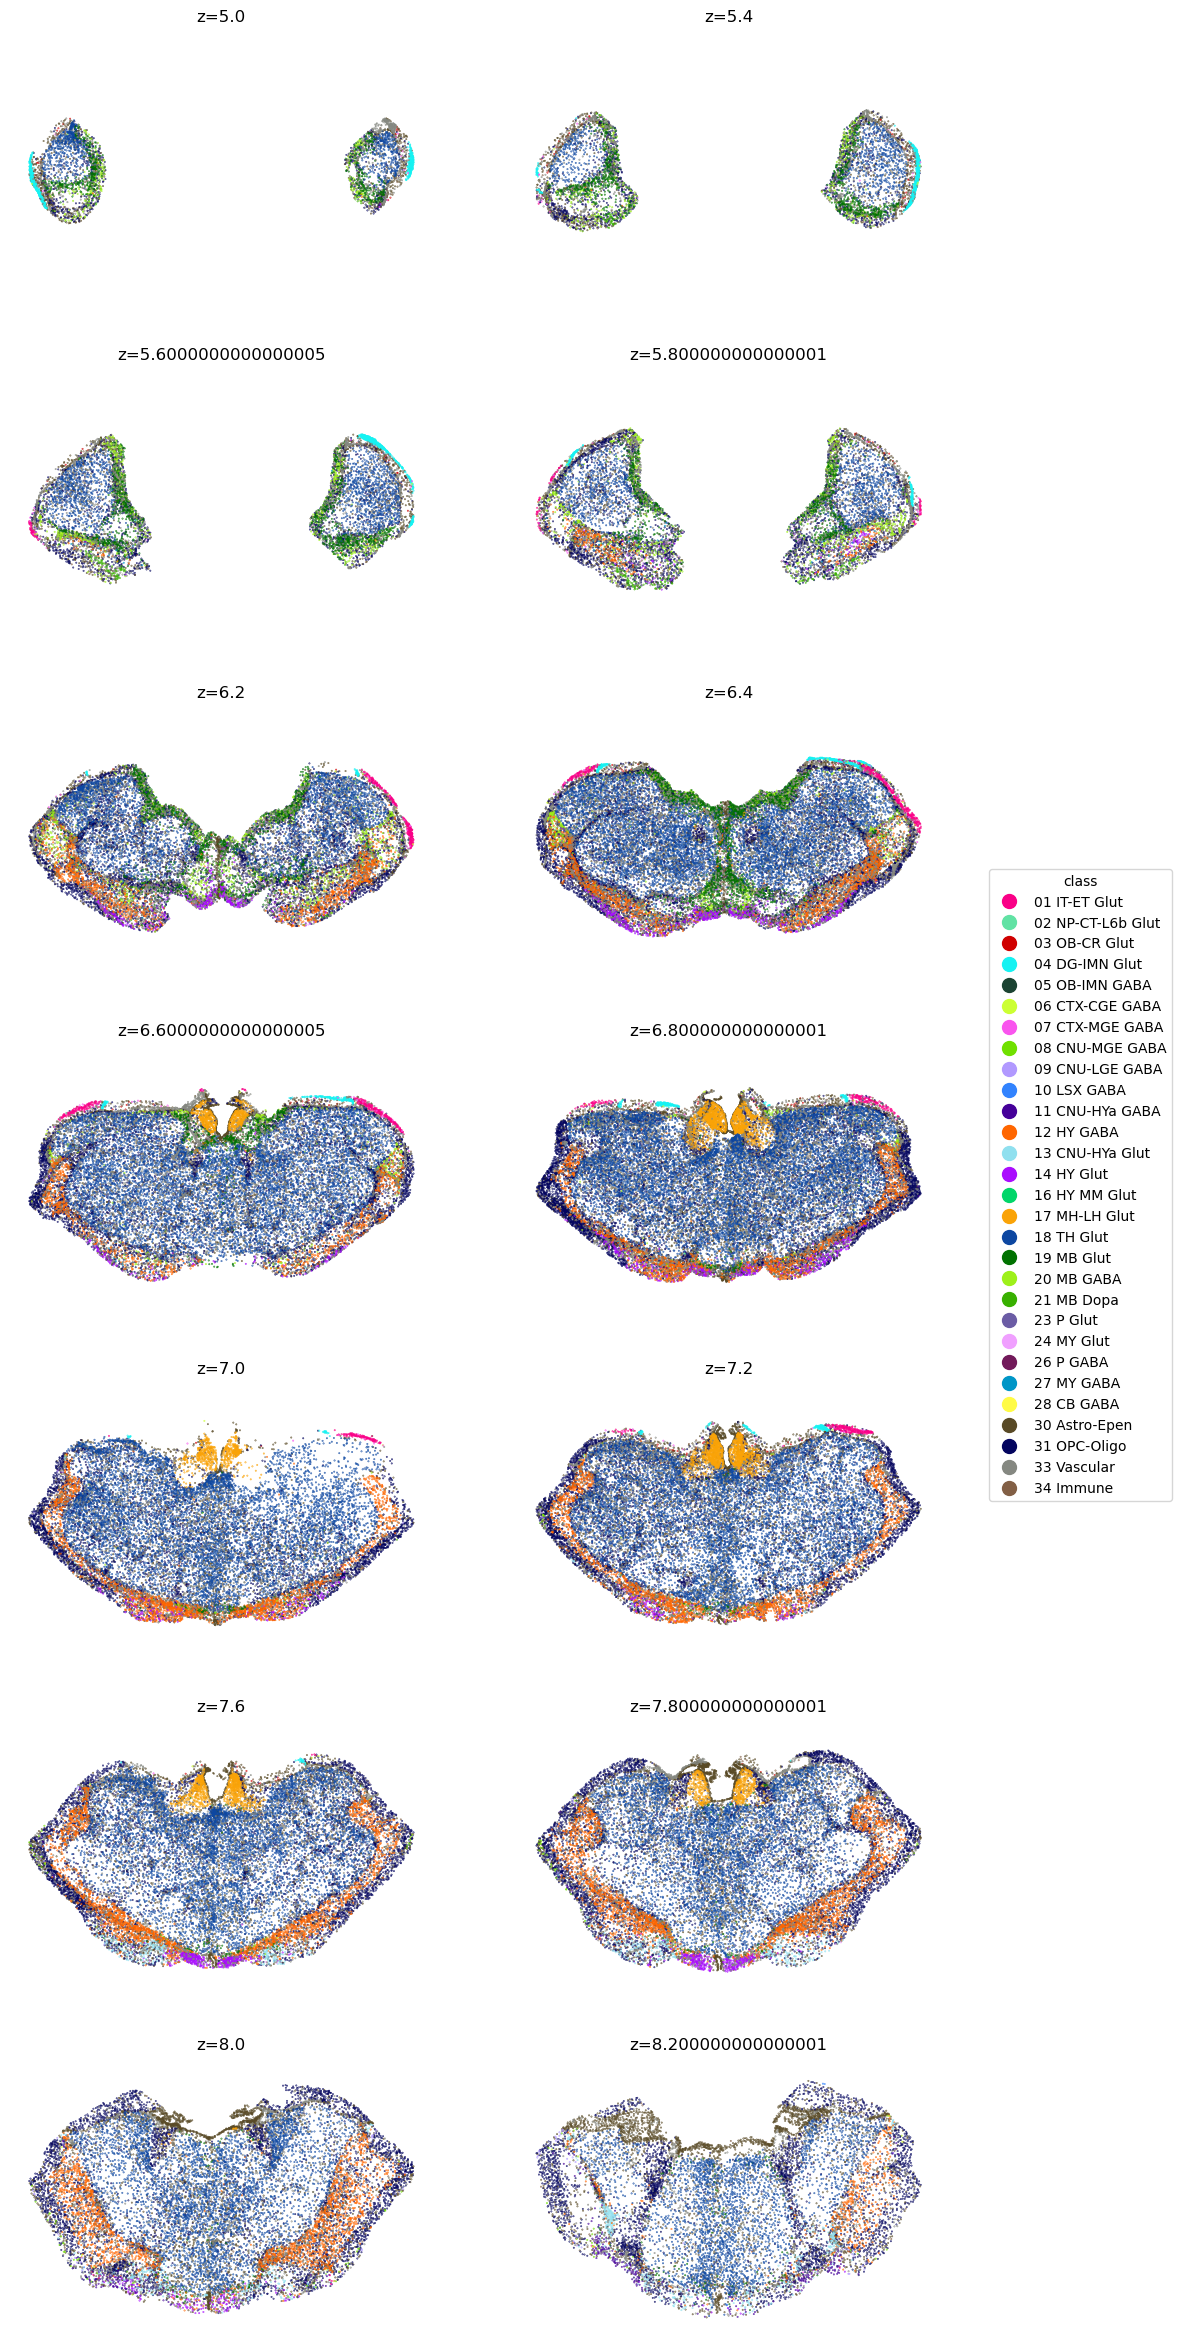

In [6]:
plot_dataset(adata_th_zi, column='class')

### display just neurons

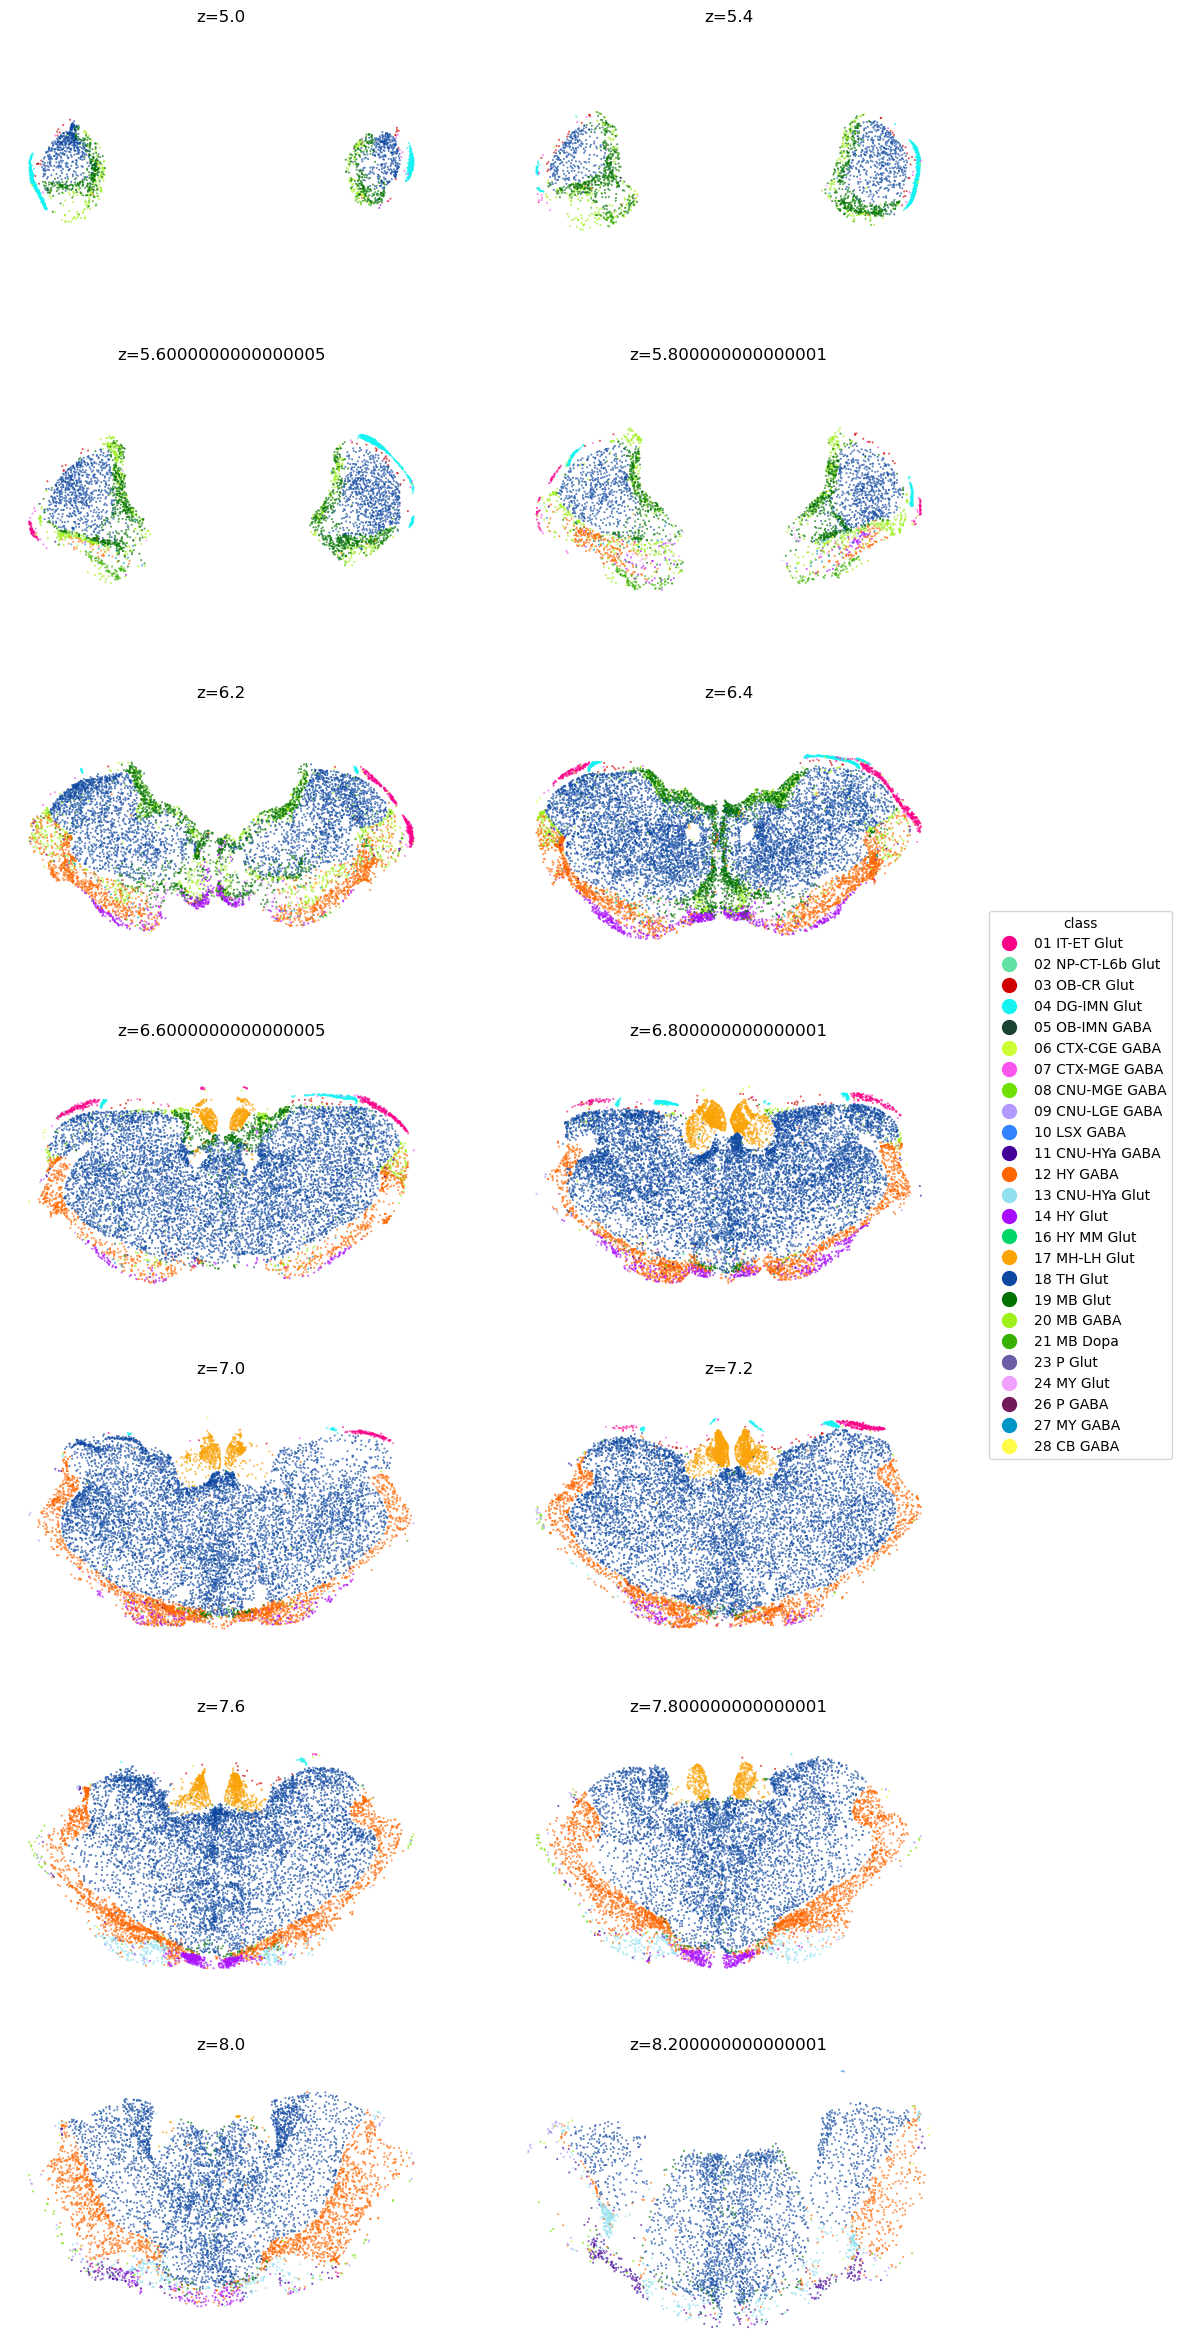

In [8]:
nn_classes = ['30 Astro-Epen', '31 OPC-Oligo', '32 OEC', '33 Vascular', '34 Immune']
plot_dataset(adata_th_zi[~adata_th_zi.obs['class'].isin(nn_classes)], column='class')

## Cleanup loaded dataset with abc.filter_adata_by_class()

### keep only TH, ZI, & MH+LH classes

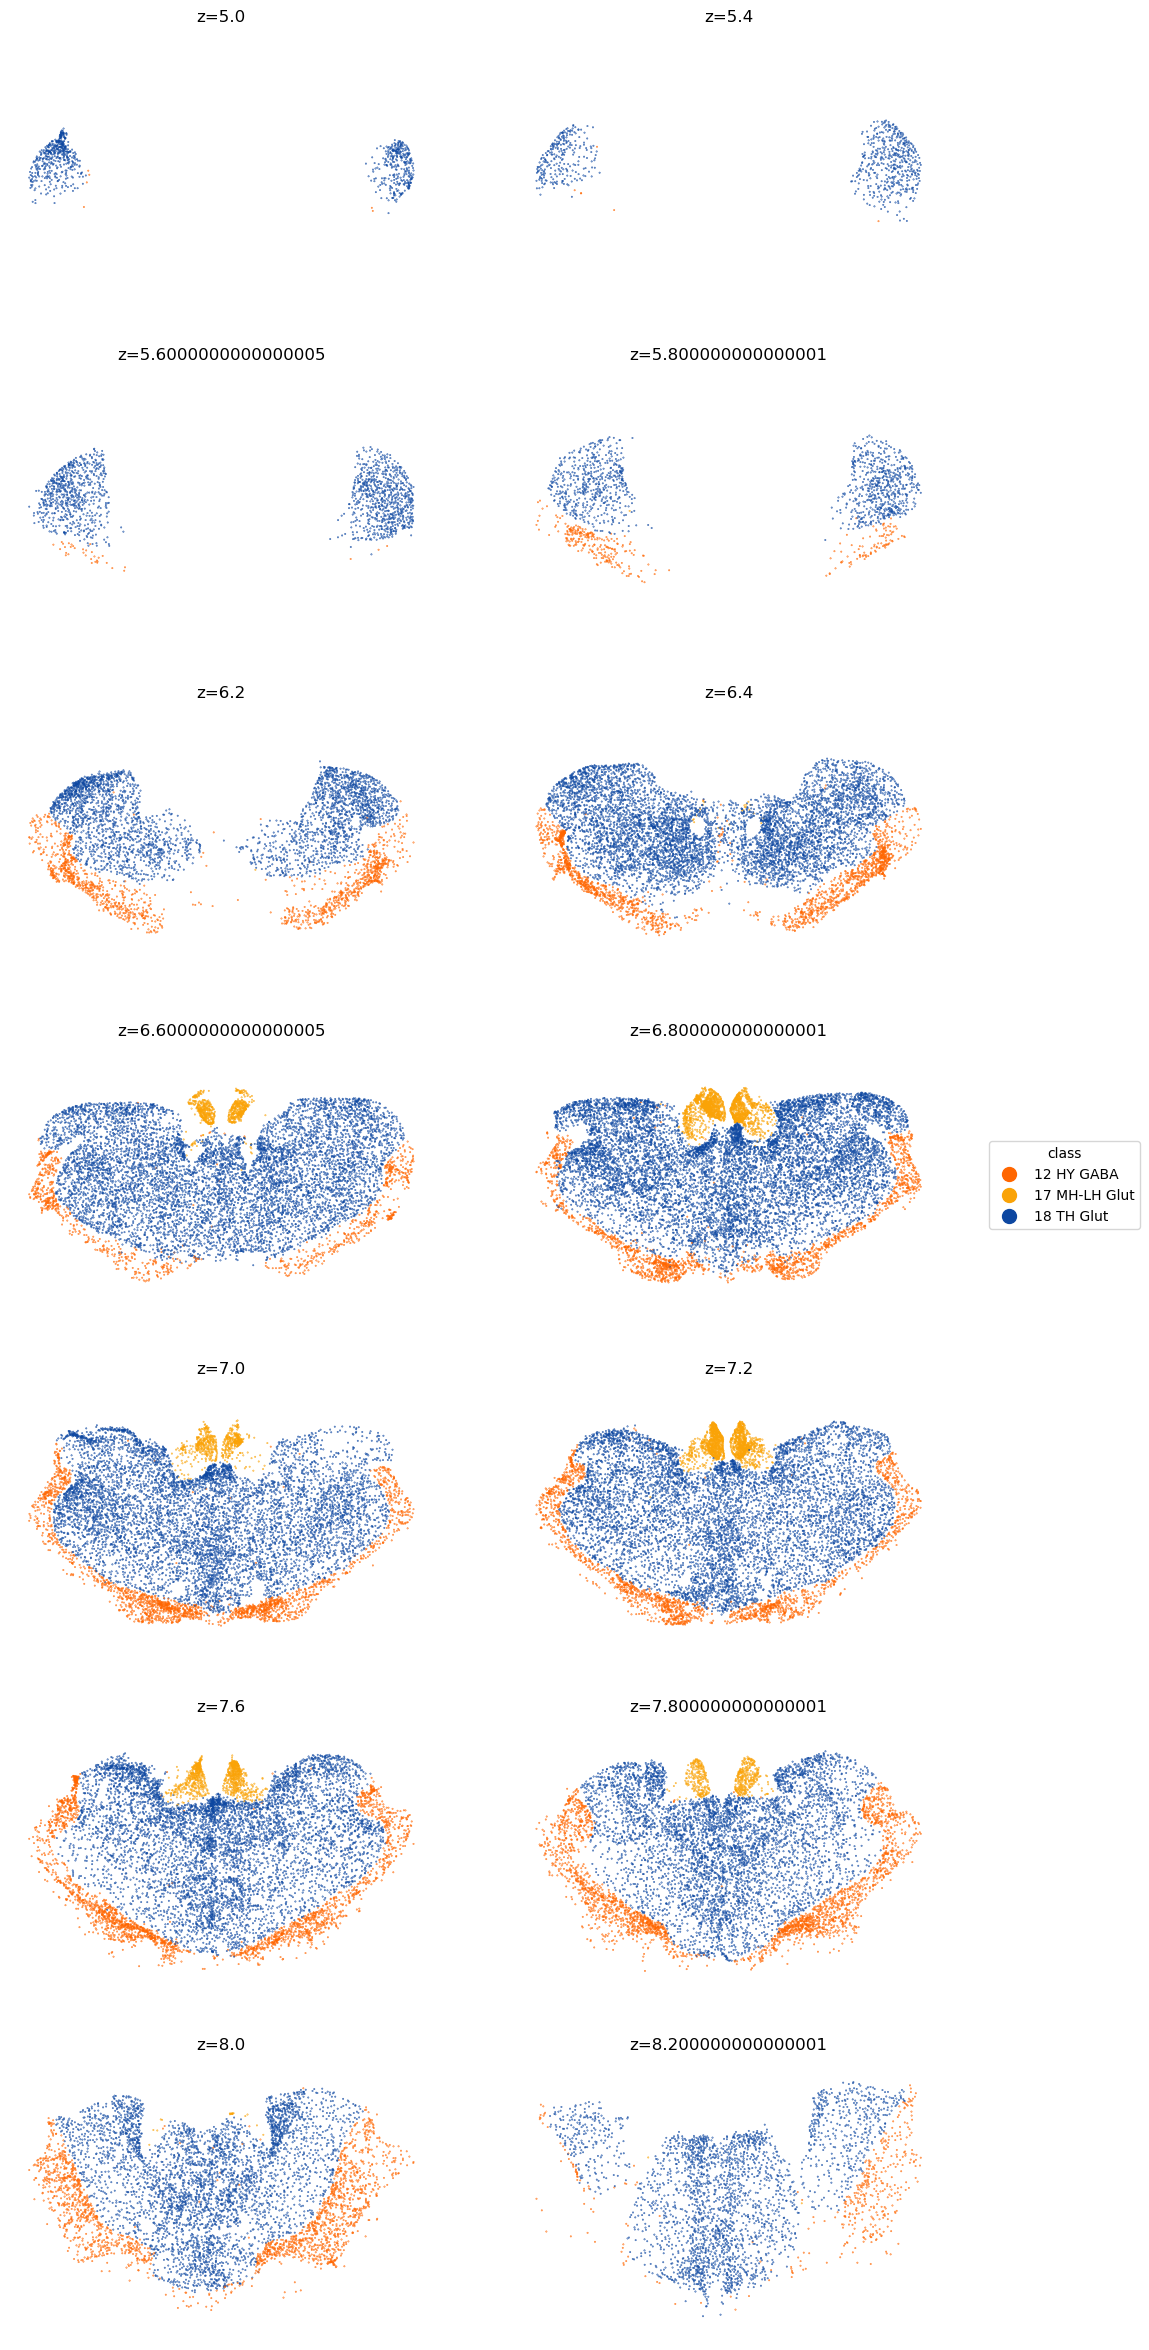

In [9]:
adata_th_zi_filter_all = abc.filter_adata_by_class(adata_th_zi, 
                                                  filter_nonneuronal=True, 
                                                  filter_midbrain=True)

plot_dataset(adata_th_zi_filter_all, column='class')

### keep midbrain classes as well

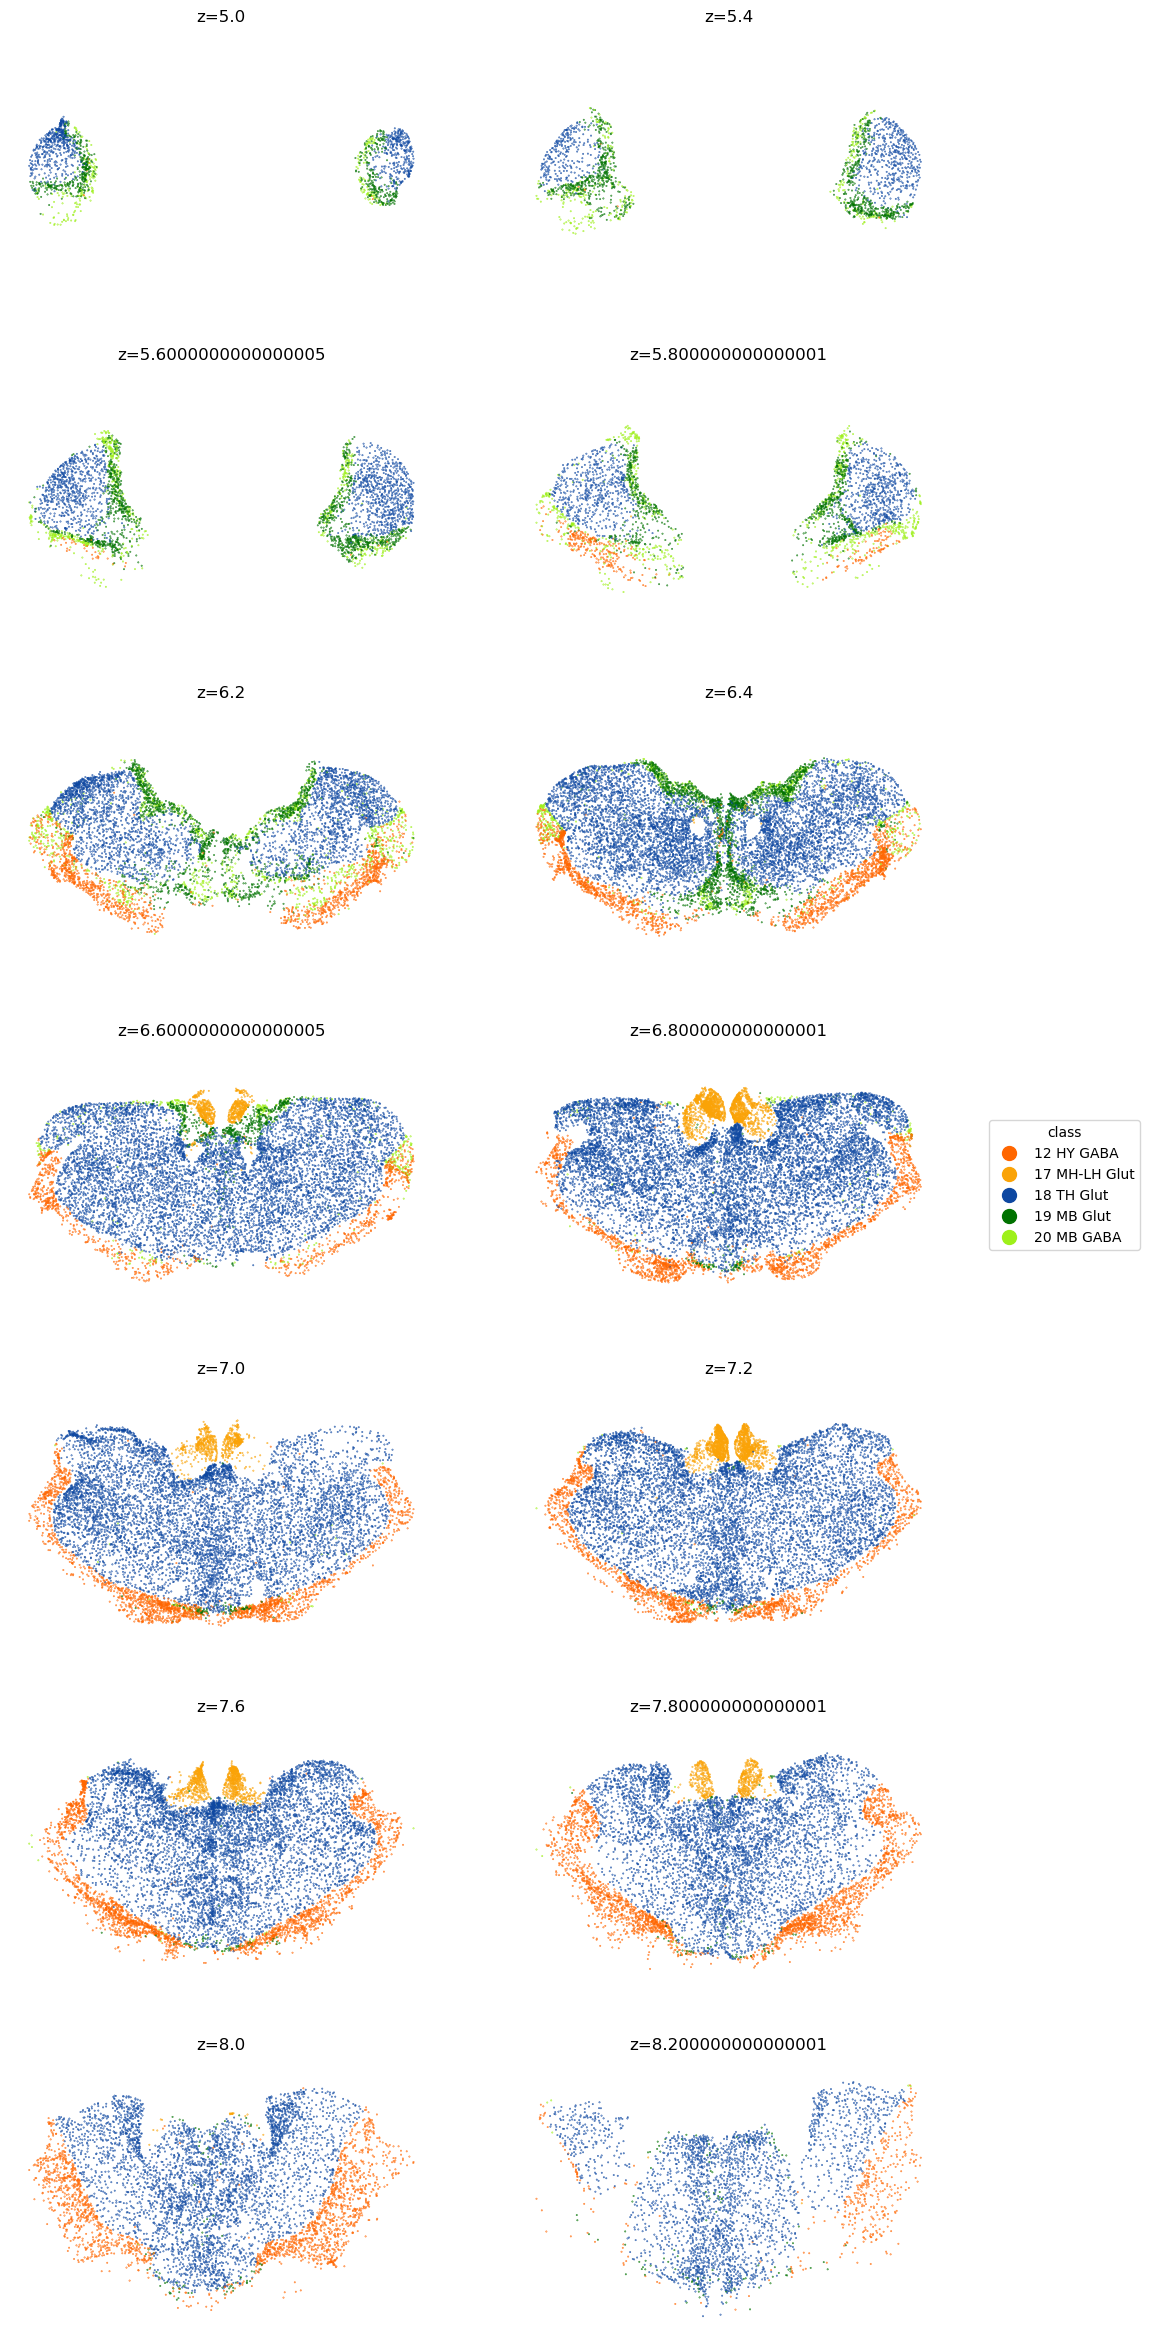

In [11]:
adata_th_zi_keep_MB = abc.filter_adata_by_class(adata_th_zi, 
                                                filter_nonneuronal=True, 
                                                filter_midbrain=False)

plot_dataset(adata_th_zi_keep_MB, column='class')